In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string, re
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
class
1    19190
2     4163
0     1430
Name: count, dtype: int64
rows =  24783
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1     

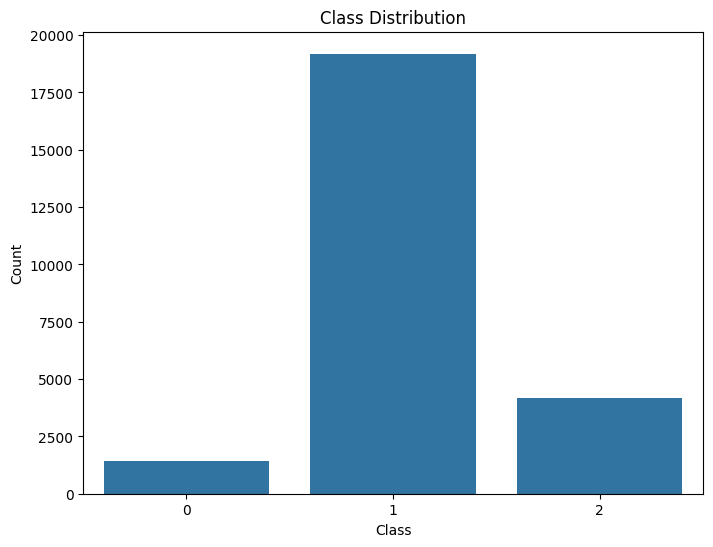

Train set: (19826,) (19826,)
Test set: (4957,) (4957,)
y test is  12946    1
11996    1
1326     1
20127    1
480      1
        ..
8968     1
15912    1
11556    1
9186     1
21133    1
Name: class, Length: 4957, dtype: int64
Cross-Validation Scores: [0.86787695 0.88297604 0.87540984 0.88423707 0.88852459]
Mean Accuracy: 0.8798048990187081
Accuracy: 0.5906798466814606
              precision    recall  f1-score   support

           0       0.07      0.07      0.07       276
           1       0.79      0.69      0.74      3848
           2       0.20      0.31      0.24       833

    accuracy                           0.59      4957
   macro avg       0.35      0.36      0.35      4957
weighted avg       0.65      0.59      0.62      4957



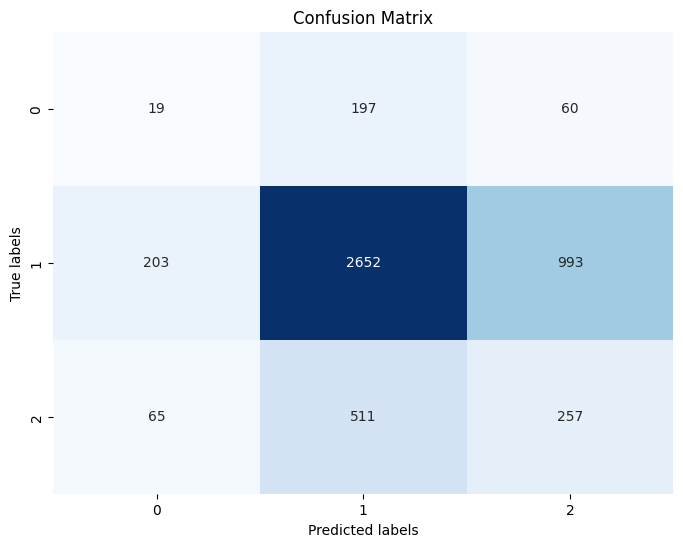

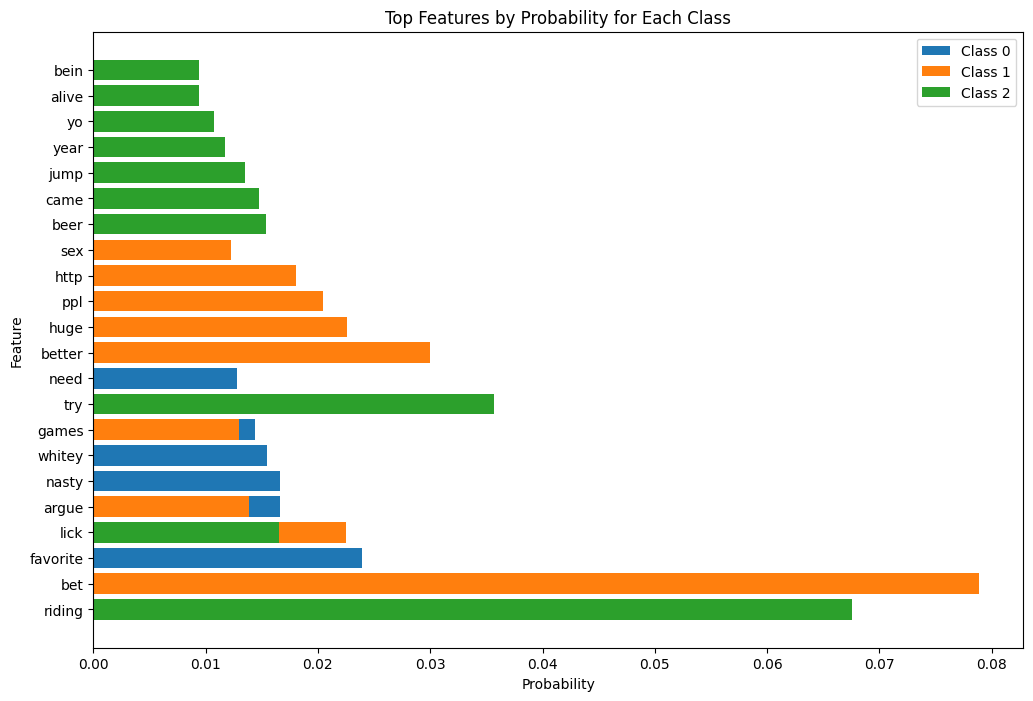

In [ ]:
## Function to remove function
def strip_special_chars(twt):
   # return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",twt).split())
    return ' '.join(re.sub("(@[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)"," ",twt.lower()).split())

# import the twitter dataset
df = pd.read_csv('/content/labeled_data.csv')
print(df.head())

print(df['class'].value_counts())
row_count = len(df)
print("rows = ", row_count)

## remove the punctuation characters in the tweet column

df['tweet']=df['tweet'].apply(strip_special_chars)
print(df.head())

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


## we only need the tweet and class columns
tdata = df['tweet']
tclass = df['class']

##Build the Train – Test Split


X_train, X_test, y_train, y_test = train_test_split( tdata, tclass, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

print("y test is ",y_test)
### feature extraction
## create the instance
CountVec = CountVectorizer(ngram_range=(1,1), preprocessor=strip_special_chars,
                           stop_words='english', min_df=5,max_features=1000)
#transform
XTrain_fitted = CountVec.fit_transform(X_train)
XTest_fitted = CountVec.fit_transform(X_test)
#Instantiating the Naive Bayes Object
Tmodel = MultinomialNB()

#k-fold testing data
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(Tmodel, XTrain_fitted, y_train, cv=k_fold, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Tmodel.fit(XTrain_fitted, y_train)
y_pred = Tmodel.predict(XTest_fitted)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


import matplotlib.pyplot as plt

# Get the feature probabilities from the Naive Bayes model
feature_probs = np.exp(Tmodel.feature_log_prob_)

# Get the feature names from the CountVectorizer
feature_names = CountVec.get_feature_names_out()

# Zip feature names with their corresponding probabilities for each class
class_probabilities = {}
for i, class_label in enumerate(Tmodel.classes_):
    class_probabilities[class_label] = zip(feature_names, feature_probs[i])

# Plot feature importance for each class
top_n = 10  # Change this to the desired number of top features
plt.figure(figsize=(12, 8))
for class_label, feature_probs in class_probabilities.items():
    sorted_probs = sorted(feature_probs, key=lambda x: x[1], reverse=True)[:top_n]
    features, probs = zip(*sorted_probs)
    plt.barh(features, probs, label=f'Class {class_label}')

plt.xlabel('Probability')
plt.ylabel('Feature')
plt.title('Top Features by Probability for Each Class')
plt.legend()
plt.show()

